<a href="https://colab.research.google.com/github/davis689/binder/blob/master/Critical_Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Critical Point


Import some key functions from SymPy to handle symbolic manipulations.

In [1]:
from sympy import diff, integrate, solve, Eq, symbols, Symbol, init_printing
from sympy.plotting import plot
init_printing()

In [2]:
p,V,T,pc,Vc,Tc,pr,Vr,Tr=symbols("p,V_m,T,p_c,V_c,T_c,p_r,V_r,T_r",positive=True, real=True) # Setup variables
R,a,b=symbols("R, a, b", positive=True,real=True,constant=True) # Setup constants

Now we'll select an equation of state. We should be able to use whichever one we want and we can write several and comment out (precede with a #) all but the one we want to use now.
The Eq function takes two arguments which are the two sides of the equation (separated by a comma). If you want to see the equation thus formed, type


```
display(eos)
```



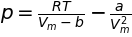

In [8]:
#eos=Eq(p*V,R*T) # ideal gas law
eos=Eq(p,R*T/(V-b)-a/V**2) # van der Waals gas 
#eos=Eq(p,R*T/(V-b)-a/(sp.sqrt(T)*V*(V+b)) # Redlich Kwong Eq
display(eos)


In [7]:
p_eq=eos # not necessary since we could just use eos directly but sets up naming parallels to derivative equations that follow.
dp_eq=Eq(diff(solve(eos,p)[0],V),0) # set first derivative equal to 0
ddp_eq=Eq(diff(solve(eos,p)[0],V,2),0) # set second derivative equal to 0

In [9]:
solve([p_eq,dp_eq,ddp_eq],[T,p,V])

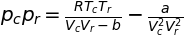

In [ ]:
eos.subs(p,pc*pr).subs(V,Vc*Vr).subs(T,Tc*Tr)

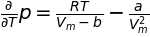

In [ ]:
diff(eos,T,evaluate=True)

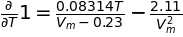

In [ ]:
dVdT=_.subs(R,0.08314).subs(a,2.11).subs(b,0.23).subs(p,1)
dVdT

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import sympy as sp
import math


def f(x,y):
    return x**2 + x*y**2


x, y = sp.symbols('x y')

def fprime(x,y):
    return sp.diff(f(x,y),x)

display(fprime(x,y)) #This works.

DerivativeOfF = sp.lambdify((x,y),sp.diff(f(x,y),x),"numpy")
(DerivativeOfF(1,1))

3

## Critical Point
The critical point is the temperature, pressure and volume where the isotherm goes through an inflection point. Since at an inflection point the first and second derivatives are zero, we can use these equations plus the equation of state to solve for the critical parameters.

First we set up the eos, and the two derivatives.

In [ ]:
p_expr=R*T/(V-b)-a/V**2
#p_expr=R*T/(V-b)-a/(sp.sqrt(T)*V*(V+b))
dp=diff(p_expr,V)
ddp=diff(p_expr,V,2)

Here we use these expressions to set up the equations using SymPy's Eq function. Here the parentheses are filled with both sides of the equation separated by a comma. The results are displayed.

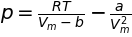

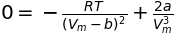

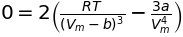

In [ ]:
p_eq=Eq(p,p_expr)
dp_eq=Eq(0,dp)
ddp_eq=Eq(0,ddp)
display(p_eq,dp_eq,ddp_eq)


Now to solve for the critical parameters, we use solve. The answer to the solve function is always a list. The , after critpoint makes solve only return the solution which is itself a list of the three critical parameters. We can assign these to variables.

In [ ]:
critpoint,=solve([p_eq,dp_eq,ddp_eq],[p,V,T])
pc,Vc,Tc=[critpoint[i] for i in range(len(critpoint))]
display(pc,Vc,Tc)

## Law of Corresponding States
Since we have the critical temperatures, pressures, and volumes in terms of van der Waals parameters, we can use them to find a real gas equation of state that is the same for all gases. First define *reduced* variables, $p_r$, $V_r$, and $T_r$ such that $p_r=p/p_c$, $V_r=V/V_c$, and $T_r=T/T_c$. Use these definitions to substitute for $p, V$, and $T$.
The result is an equation that has no $a$ or $b$ parameters. It says that as a fraction of the way to the critical point, every gas behaves the same. Of course, he applicability of this equation depends on the applicability of the equation of state we've chosen.

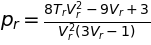

In [ ]:
Vr,pr,Tr=sp.symbols("V_r,p_r,T_r")
cs_eos=sp.Eq(p_expr.subs({V:Vc*Vr,T:Tc*Tr}).subs({Tc:Tc,Vc:Vc}),pc*pr.subs(pc,pc))# Setup equation and substitute reduced and critical values into it.
lcs=sp.Eq(pr,solve(cs_eos,pr)[0]) # solve equation for pr (which will result in only the right hand side of the equation) and write as an equation.
display(lcs)